In [ ]:
코로나 19는 경제, 사회 분야의 구조적 변화를 촉발하여 비대면화와 디지털 전환을 가속화 시키고 있으며, 
비대면 거래의 증가에 따라 2020년 택배물량은 약 30억 건으로 전년대비21% 급증하였습니다.

따라서, 택배 운송량을 예측하여 비대면 경제의 발전을 예측하기 위한 프로젝트입니다.
("Dacon 물류 유통량 예측 경진대회 ")

train_df.csv

index : 인덱스
SEND_SPG_INNB : 송하인_격자공간고유번호
REC_SPG_INNB : 수하인 격자공간고유번호
DL_GD_LCLS_NM : 카테고리_대
DL_GD_MCLS_NM : 카테고리_중
INVC_CONT : 운송장 건 수


test_df.csv

index : 인덱스
SEND_SPG_INNB : 송하인_격자공간고유번호
REC_SPG_INNB : 수하인 격자공간고유번호
DL_GD_LCLS_NM : 카테고리_대
DL_GD_MCLS_NM : 카테고리_중




sample_submission.csv

index : 인덱스
INVC_CONT : 운송장 건 수



In [ ]:
#한국어 폰트 다운로드 
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

#  라이브러리 불러오기 및 데이터 불러오기

In [ ]:
%matplotlib inline
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
from matplotlib import font_manager, rc 

train = pd.read_csv("https://raw.githubusercontent.com/annsyj94/Data_Science_Contest-/main/%ED%83%9D%EB%B0%B0%20%EC%9A%B4%EC%86%A1%EB%9F%89%20%EC%98%88%EC%B8%A1%20%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C/train_df.csv")
test = pd.read_csv("https://raw.githubusercontent.com/annsyj94/Data_Science_Contest-/main/%ED%83%9D%EB%B0%B0%20%EC%9A%B4%EC%86%A1%EB%9F%89%20%EC%98%88%EC%B8%A1%20%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C/test_df.csv")
submission = pd.read_csv("https://raw.githubusercontent.com/annsyj94/Data_Science_Contest-/main/%ED%83%9D%EB%B0%B0%20%EC%9A%B4%EC%86%A1%EB%9F%89%20%EC%98%88%EC%B8%A1%20%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C/sample_submission.csv")

print(train.shape)
train.head(5)

(32000, 6)


,index,SEND_SPG_INNB,REC_SPG_INNB,DL_GD_LCLS_NM,DL_GD_MCLS_NM,INVC_CONT
0,0,1.129000e+15,5.011000e+15,패션의류,상의,3
1,1,1.135000e+15,5.011000e+15,생활/건강,반려동물,3
2,2,1.135000e+15,5.011000e+15,패션의류,기타패션의류,9
3,3,1.154500e+15,5.011000e+15,식품,농산물,10
4,4,1.165000e+15,5.011000e+15,식품,가공식품,3


In [ ]:
print(test.shape)
test.head(5)

(4640, 5)


,index,SEND_SPG_INNB,REC_SPG_INNB,DL_GD_LCLS_NM,DL_GD_MCLS_NM
0,32000,5.013000e+15,1.165000e+15,식품,농산물
1,32001,5.013000e+15,1.154500e+15,식품,농산물
2,32002,5.013000e+15,4.139000e+15,식품,농산물
3,32003,5.013000e+15,4.221000e+15,식품,농산물
4,32004,5.013000e+15,2.726000e+15,식품,농산물


In [ ]:
print(submission.shape)
submission.head(10)

(4640, 2)


,index,INVC_CONT
0,32000,0
1,32001,0
2,32002,0
3,32003,0
4,32004,0
5,32005,0
6,32006,0
7,32007,0
8,32008,0
9,32009,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          32000 non-null  int64  
 1   SEND_SPG_INNB  32000 non-null  float64
 2   REC_SPG_INNB   32000 non-null  float64
 3   DL_GD_LCLS_NM  32000 non-null  object 
 4   DL_GD_MCLS_NM  32000 non-null  object 
 5   INVC_CONT      32000 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 1.5+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4640 entries, 0 to 4639
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          4640 non-null   int64  
 1   SEND_SPG_INNB  4640 non-null   float64
 2   REC_SPG_INNB   4640 non-null   float64
 3   DL_GD_LCLS_NM  4640 non-null   object 
 4   DL_GD_MCLS_NM  4640 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 181.4+ KB


# **그래프 및 차트**

In [ ]:
total = train.groupby('DL_GD_LCLS_NM')['INVC_CONT'].agg(np.sum).rename_axis('제품').reset_index(name='합계')
total.head()

,제품,합계
0,디지털/가전,1578
1,생활/건강,10924
2,식품,129209
3,여행/문화,5911
4,패션의류,3887


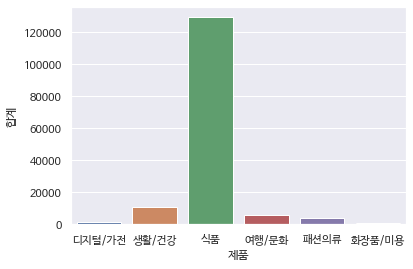

In [ ]:
#카테테고 중에서 제일 많이 나가는 택배  

def Graphbar1 (box1,horizon,vertical):
   sns.set(font="NanumBarunGothic",  
           rc={"axes.unicode_minus":False}, 
           style='darkgrid'),
   sns.barplot(x=horizon, y=vertical, data=box1)
  

Graphbar1(total,"제품","합계")

In [ ]:
#카테고리(중)합계 차트 만들기
category = train.groupby('DL_GD_MCLS_NM')['INVC_CONT'].agg(np.sum).rename_axis('카테고리').reset_index(name='합계')
category 

,카테고리,합계
0,가공식품,6283
1,건강식품,3763
2,건강용품,1802
3,과자,2007
4,기타디지털/가전,1578
5,기타식품,4696
6,기타패션의류,2708
7,냉동/간편조리식품,2068
8,농산물,95239
9,문구/사무용품,1422


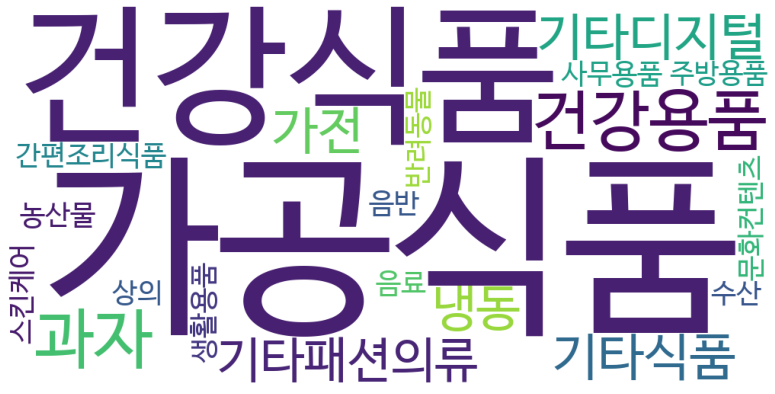

In [ ]:
#태그들을 분석하여 제일 인기있는 물류찾기
from wordcloud import WordCloud 

text = " ".join(category['카테고리'])

def wordjoin(text, width=1000, height=500):
    word_draw = WordCloud(
        font_path=r"/Library/Fonts/NanumBarunGothic.ttf",
        background_color="white",
        stopwords=['문구','축산'],
        width=width, height=height,
        random_state=42
    )

    word_draw.generate(text)

    plt.figure(figsize=(20,7))
    plt.imshow(word_draw)
    plt.axis("off")
    plt.show()

wordjoin(text,width=1000, height=500)

In [ ]:
cate_count = pd.Series(train["DL_GD_MCLS_NM"]).value_counts()
cate_count.head()

농산물      22162
문화컨텐츠     1192
음료        1126
수산         931
가공식품       923
Name: DL_GD_MCLS_NM, dtype: int64

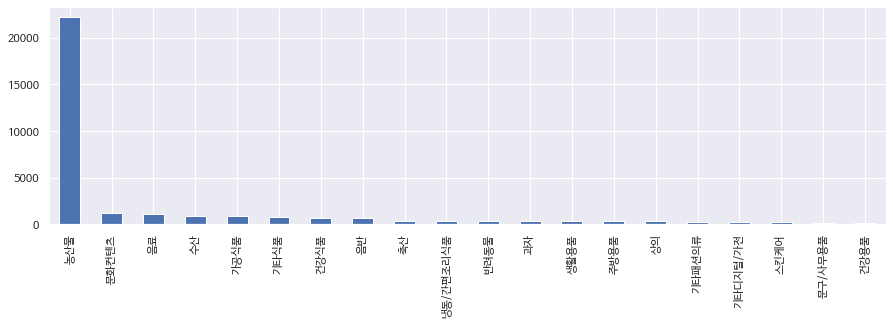

In [ ]:
cate_count.head(20).plot.bar(figsize=(15, 4))

# **모델링 만들기**

In [ ]:
train_2 = train.drop("DL_GD_MCLS_NM",axis=1)
train_2 = pd.get_dummies(train_2,columns = ['DL_GD_LCLS_NM'])

train_2.head(3)

,index,SEND_SPG_INNB,REC_SPG_INNB,INVC_CONT,DL_GD_LCLS_NM_디지털/가전,DL_GD_LCLS_NM_생활/건강,DL_GD_LCLS_NM_식품,DL_GD_LCLS_NM_여행/문화,DL_GD_LCLS_NM_패션의류,DL_GD_LCLS_NM_화장품/미용
0,0,1.129000e+15,5.011000e+15,3,0,0,0,0,1,0
1,1,1.135000e+15,5.011000e+15,3,0,1,0,0,0,0
2,2,1.135000e+15,5.011000e+15,9,0,0,0,0,1,0


In [ ]:
x = train_2.drop('INVC_CONT',axis=1)
y = train_2['INVC_CONT']

test = test.drop("DL_GD_MCLS_NM",axis=1)
test = pd.get_dummies(test, columns = ['DL_GD_LCLS_NM'])


print(x.shape)
print(y.shape)
print(test.shape)

(32000, 9)
(32000,)
(4640, 9)


In [ ]:
#train,test로 나누기
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

print("x_train:",x_train.shape)
print("x_test:",x_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

x_train: (22400, 9)
x_test: (9600, 9)
y_train: (22400,)
y_test: (9600,)


In [ ]:
#LogisticRegression 사용하기 
from sklearn.linear_model import LogisticRegression

lrg = LogisticRegression()
lrg.fit(x_train,y_train)

print(lrg.score(x_train,y_train))

0.5557589285714286


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
#예측
y_pred=lrg.predict(x_test)
y_pred

array([3, 3, 3, ..., 3, 3, 3])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae= mean_absolute_error(y_test,y_pred)
mse= mean_squared_error(y_test,y_pred)

print("mae:",mae)
print("mse:",mse)

mae: 1.7923958333333334
mse: 41.208020833333336


In [ ]:
# metrics를 가지고 정확한 정답 나오기 

from sklearn.metrics import confusion_matrix

con = confusion_matrix(y_test,y_pred)
print(con)

accuracy=(con[0,0]+con[1,1])/(con[0,0]+con[1,0]+con[0,1]+con[1,1])
print(accuracy)

[[5321    0    0 ...    0    0    0]
 [1838    0    0 ...    0    0    0]
 [ 920    0    0 ...    0    0    0]
 ...
 [   1    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]]
0.7432602318759604


In [ ]:
lrg.fit(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_pred=lrg.predict(test)

In [ ]:
sub=pd.DataFrame({
        "index": test["index"],
        "INVC_CONT": y_pred
    })

sub.head(5)

,index,INVC_CONT
0,32000,3
1,32001,3
2,32002,3
3,32003,3
4,32004,3


# **정답파일 생성**

In [ ]:
#Binarizer(이향변수화 변환)
#'INVC_CONT'를 0~1로 변환하기 

from sklearn.preprocessing import Binarizer

count = sub['INVC_CONT'].values
count = count.reshape(-1,1)

count

array([[3],
       [3],
       [3],
       ...,
       [3],
       [3],
       [3]])

In [ ]:
bi = Binarizer(threshold=5)
bi.fit_transform(count)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
sub["INVC_CONT"] = bi.fit_transform(count)
sub.head(5)

,index,INVC_CONT
0,32000,0
1,32001,0
2,32002,0
3,32003,0
4,32004,0


In [ ]:
#csv로 저장 
sub.to_csv('submission_by_Kelly.csv',index=False)
print("save")

save
